#### https://www.kaggle.com/uciml/pima-indians-diabetes-database/data#
#### Objective of the model is predict whether or not a patient has diabetes, based on certain diagnostic measurements/predictor variables. All the patients are female. 

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE


In [91]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.dtypes
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
# Target variable is Outcome, 0 is not diabetic, 1 is diabetic. Except the last column, all are predictor variables (X)
X = diabetes.iloc[:,:8]
y = diabetes.Outcome
print(X.shape, y.shape)
X.head()

(768, 8) (768,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [93]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [94]:
from sklearn.metrics import mean_squared_error as MSE
# Split data into 60% train and 40% test
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4,random_state=3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini', max_depth=3,random_state=1)

(460, 8) (460,)
(308, 8) (308,)


In [95]:
# Fit DecisionTreeClassifier (dt) to the training set and calculate accuracy score, and Mean squared error for test data
dt.fit(X_train,y_train)
# Predict test-set labels
y_pred= dt.predict(X_test)
# Evaluate test-set accuracy
print('Accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
# Compute test-set MSE
#mse_dt = MSE(y_test, y_pred)
print('Test MSE: {:.3f}'.format(MSE(y_test, y_pred)))
# Compute test-set RMSE
#rmse_dt = mse_dt**(1/2)
print('Test RMSE: {:.3f}'.format(MSE(y_test, y_pred)**(1/2)))

Accuracy score: 0.685
Test MSE: 0.315
Test RMSE: 0.561


#### Accuracy score improved and got lower MSE with higher test_size. For test_size of either 0.2 or 0.3, the accuracy score and MSE for test data is 0.649 and 0.351 respectively. max_depth is also impacting the score and MSE. if depth=2, the score was above 0.7 and MSE is below 0.3, if depth=3, the score and MSE are 0.685, and 0.315 respectively.  

In [96]:
print( 'Predicted class %s' % (y_pred))

Predicted class [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [97]:
print( 'Probabilities for each class from 0 to 2: %s' % dt.predict_proba(X_test))

Probabilities for each class from 0 to 2: [[0.94152047 0.05847953]
 [0.28947368 0.71052632]
 [0.94152047 0.05847953]
 [1.         0.        ]
 [0.56692913 0.43307087]
 [0.76923077 0.23076923]
 [0.56692913 0.43307087]
 [0.94152047 0.05847953]
 [0.56692913 0.43307087]
 [0.94152047 0.05847953]
 [0.6875     0.3125    ]
 [0.92105263 0.07894737]
 [0.94152047 0.05847953]
 [0.1025641  0.8974359 ]
 [0.56692913 0.43307087]
 [0.94152047 0.05847953]
 [0.94152047 0.05847953]
 [0.94152047 0.05847953]
 [0.56692913 0.43307087]
 [0.56692913 0.43307087]
 [0.94152047 0.05847953]
 [0.94152047 0.05847953]
 [0.94152047 0.05847953]
 [0.6875     0.3125    ]
 [0.94152047 0.05847953]
 [0.1025641  0.8974359 ]
 [0.94152047 0.05847953]
 [0.94152047 0.05847953]
 [0.56692913 0.43307087]
 [0.6875     0.3125    ]
 [0.1025641  0.8974359 ]
 [0.56692913 0.43307087]
 [0.56692913 0.43307087]
 [0.6875     0.3125    ]
 [0.56692913 0.43307087]
 [0.94152047 0.05847953]
 [0.6875     0.3125    ]
 [0.56692913 0.43307087]
 [0.9415

#### Probabilites for each patient in the test dataset whether or not she is a diabetic

In [98]:
# Instantiate decision tree regressor and assign it to 'dtr'
dtr = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.2, random_state=1)

In [99]:
MSE_CV = - cross_val_score(dtr, X_train, y_train, cv=20,
scoring='neg_mean_squared_error',n_jobs = -1)
# Fit decision tree regressor 'dtr' to the training set
dtr.fit(X_train, y_train)
# Predict the labels of training set
y_predict_train = dtr.predict(X_train)
# Predict the labels of test set
y_predict_test = dtr.predict(X_test)

In [100]:
# CV MSE
print('CV MSE: {:.3f}'.format(MSE_CV.mean()))

# Training set MSE
print('Train MSE: {:.3f}'.format(MSE(y_train, y_predict_train)))

# Test set MSE
print('Test MSE: {:.3f}'.format(MSE(y_test, y_predict_test)))


CV MSE: 0.183
Train MSE: 0.160
Test MSE: 0.194


#### For CV values of 10, 5, 15, 20 then CV_MSE values are: 0.174, 0.175, 0.177, and 0.183 respectively

[Text(167.4, 190.26, 'X[1] <= 144.5\nentropy = 0.428\nsamples = 460\nvalue = [317, 143]'),
 Text(83.7, 135.9, 'X[7] <= 28.5\nentropy = 0.334\nsamples = 368\nvalue = [290, 78]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 127.5\nentropy = 0.178\nsamples = 203\nvalue = [183, 20]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.11\nsamples = 171\nvalue = [161, 10]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.43\nsamples = 32\nvalue = [22, 10]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 27.55\nentropy = 0.456\nsamples = 165\nvalue = [107, 58]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.145\nsamples = 38\nvalue = [35, 3]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.491\nsamples = 127\nvalue = [72, 55]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 166.5\nentropy = 0.415\nsamples = 92\nvalue = [27, 65]'),
 Text(209.25, 81.53999999999999, 'X[4] <= 166.5\nentropy = 0.484\nsamples = 51\nvalue = [21, 30]'),
 Text(188.32500000000002, 27.180000000000007, 'en

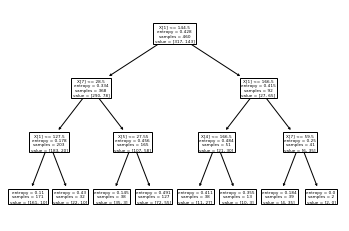

In [101]:
tree.plot_tree(dt)


[Text(223.20000000000002, 190.26, 'X[1] <= 144.5\nentropy = 0.214\nsamples = 460\nvalue = 0.311'),
 Text(167.4, 135.9, 'X[7] <= 28.5\nentropy = 0.167\nsamples = 368\nvalue = 0.212'),
 Text(111.60000000000001, 81.53999999999999, 'X[5] <= 29.95\nentropy = 0.089\nsamples = 203\nvalue = 0.099'),
 Text(55.800000000000004, 27.180000000000007, 'entropy = 0.02\nsamples = 97\nvalue = 0.021'),
 Text(167.4, 27.180000000000007, 'entropy = 0.141\nsamples = 106\nvalue = 0.17'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.228\nsamples = 165\nvalue = 0.352'),
 Text(279.0, 135.9, 'entropy = 0.207\nsamples = 92\nvalue = 0.707')]

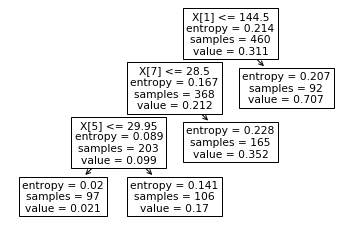

In [102]:
tree.plot_tree(dtr)

#### I think this is a classfication problem and not a regression problem, so using DecisionTreeClassifier model is appropriate.